<h1>On the Importance of Data Quality for Predictive models</h1>

<h1>A. Data collection and aggregation</h1>
<h2>Identification</h2> 

- Size, 

- number and type of attributes, 

- estimate labelling and data errors

<h2>Joining different data formats</h2> 

- Strucutred, semi-structured, unstructured. 

- Checking integrity. 

- Naming, value or type conflicts. 

- Redundancy.

## annotating

- internal, outsourced or crowdsourced

<h1>B. What to clean up in a dataset?</h1>

Examples and solutions.

['malignant' 'benign']
0 :  mean radius
1 :  mean texture
2 :  mean perimeter
3 :  mean area
4 :  mean smoothness
5 :  mean compactness
6 :  mean concavity
7 :  mean concave points
8 :  mean symmetry
9 :  mean fractal dimension
10 :  radius error
11 :  texture error
12 :  perimeter error
13 :  area error
14 :  smoothness error
15 :  compactness error
16 :  concavity error
17 :  concave points error
18 :  symmetry error
19 :  fractal dimension error
20 :  worst radius
21 :  worst texture
22 :  worst perimeter
23 :  worst area
24 :  worst smoothness
25 :  worst compactness
26 :  worst concavity
27 :  worst concave points
28 :  worst symmetry
29 :  worst fractal dimension
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
number of featur

Text(0, 0.5, 'mean perimeter')

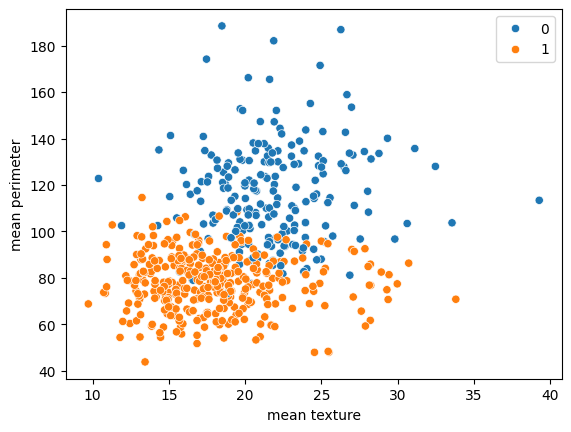

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from scipy.stats import bernoulli, norm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Load dataset
data = load_breast_cancer()

# Organize our data
label_names = data['target_names']
labels = data['target']
feature_names = data['feature_names']
features = data['data']

# Look at our data
print(label_names)
# print('Class label = ', labels[0])
for i in range(len(feature_names)):
    print(i, ": ", feature_names[i])
print(features[0])
print("number of features: ", len(feature_names))
print("number of instances: ", len(labels))


feat_1 = 1
feat_2 = 2
ax = sns.scatterplot(x=features[:, feat_1], y=features[:, feat_2], hue=labels[:])
# ax.legend(['no cancer'], ['cancer'])
plt.xlabel(feature_names[feat_1])
plt.ylabel(feature_names[feat_2])

In [3]:
# Training on good data
# Split our data
train, test, train_labels, test_labels = train_test_split(features,
                                                          labels,
                                                          test_size=0.33,
                                                          random_state=42)

# Initialize our classifier
gnb = GaussianNB()

# Train our classifier
model = gnb.fit(train, train_labels)

# Make predictions
preds = gnb.predict(test)
# print(preds)

# Evaluate accuracy
print(accuracy_score(test_labels, preds))


0.9414893617021277


### missing data set to zero

<Axes: >

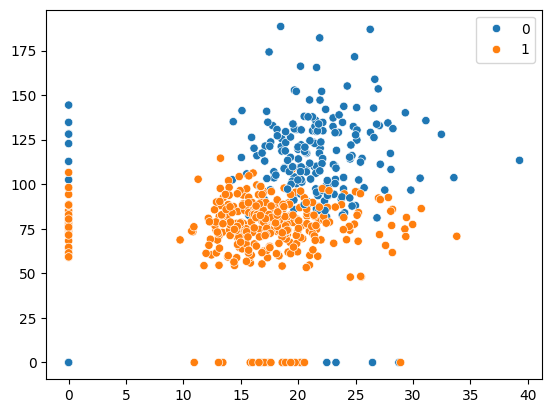

In [4]:
# Load dataset
data = load_breast_cancer()
# a dataset with missing data, set to zero
p_miss = 0.05
incompl_features = data['data']
for i in range(len(feature_names)):
    for j in range(len(features)):
        missing = bernoulli.rvs(p_miss)
        if missing ==1:
            incompl_features[j][i] = 0

sns.scatterplot(x=incompl_features[:, feat_1], y=incompl_features[:, feat_2], hue=labels[:])

In [5]:
# training with missing data set to zero
# Split our data
train, test, train_labels, test_labels = train_test_split(incompl_features,
                                                          labels,
                                                          test_size=0.33,
                                                          random_state=42)

# Initialize our classifier
gnb = GaussianNB()

# Train our classifier
model = gnb.fit(train, train_labels)

# Make predictions
preds = gnb.predict(test)
# print(preds)

# Evaluate accuracy
print(accuracy_score(test_labels, preds))

0.9308510638297872


### missing data set to mean

<Axes: >

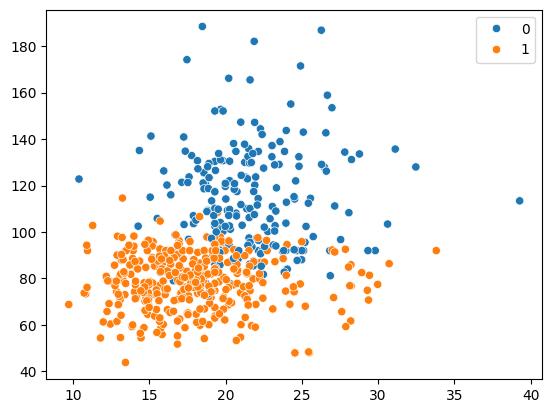

In [6]:
# Load dataset
data = load_breast_cancer()
# a dataset with missing data, set to mean
p_miss = 0.05
incompl_features_mean = data['data']
for i in range(len(feature_names)):
    for j in range(len(features)):
        missing = bernoulli.rvs(p_miss)
        if missing ==1:
            incompl_features_mean[j][i] = np.mean(features[:,i])

sns.scatterplot(x=incompl_features_mean[:, feat_1], y=incompl_features_mean[:, feat_2], hue=labels[:])

In [9]:
# training with missing data set to mean
# Split our data
train, test, train_labels, test_labels = train_test_split(incompl_features,
                                                          labels,
                                                          test_size=0.33,
                                                          random_state=42)

# Initialize our classifier
gnb = GaussianNB()

# Train our classifier
model = gnb.fit(train, train_labels)

# Make predictions
preds = gnb.predict(test)
# print(preds)

# Evaluate accuracy
print(accuracy_score(test_labels, preds))

0.9308510638297872


### labelling errors

<Axes: >

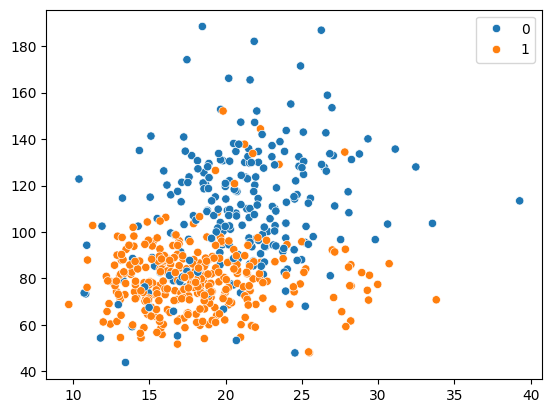

In [7]:
# Load dataset
data = load_breast_cancer()
# a dataset with labelling errors
p_flip = 0.1
bad_labels = data['target']
for i in range(len(labels)):
    r = bernoulli.rvs(p_flip)
    if r == 1:
        bad_labels[i] = 1-labels[i]

sns.scatterplot(x=features[:, feat_1], y=features[:, feat_2], hue=bad_labels[:])

In [10]:
# training with labelling errors
# Split our data
train, test, train_labels, test_labels = train_test_split(features,
                                                          bad_labels,
                                                          test_size=0.33,
                                                          random_state=42)

# Initialize our classifier
gnb = GaussianNB()

# Train our classifier
model = gnb.fit(train, train_labels)

# Make predictions
preds = gnb.predict(test)
# print(preds)

# Evaluate accuracy
print(accuracy_score(test_labels, preds))

0.8670212765957447


### noisy data

<Axes: >

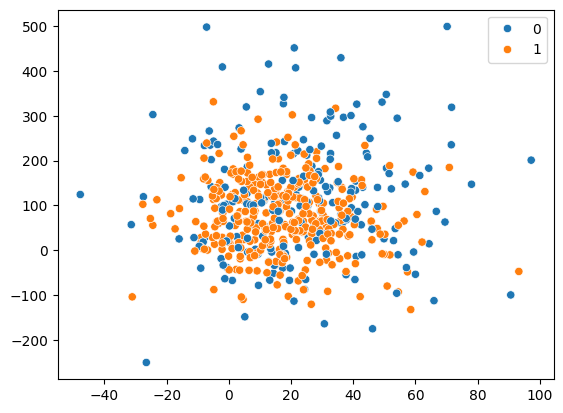

In [8]:
# Load dataset
data = load_breast_cancer()
# a dataset with data errors
bad_features = data['data']
for i in range(len(feature_names)):
    for j in range(len(features)):
        error = norm.rvs()
        bad_features[j][i] += error*features[j][i]

sns.scatterplot(x=bad_features[:, feat_1], y=bad_features[:, feat_2], hue=labels[:])

In [11]:
# training with noisy data
# Split our data
train, test, train_labels, test_labels = train_test_split(bad_features,
                                                          labels,
                                                          test_size=0.33,
                                                          random_state=42)

# Initialize our classifier
gnb = GaussianNB()

# Train our classifier
model = gnb.fit(train, train_labels)

# Make predictions
preds = gnb.predict(test)
# print(preds)

# Evaluate accuracy
print(accuracy_score(test_labels, preds))

0.9095744680851063


### data with outliers

<Axes: >

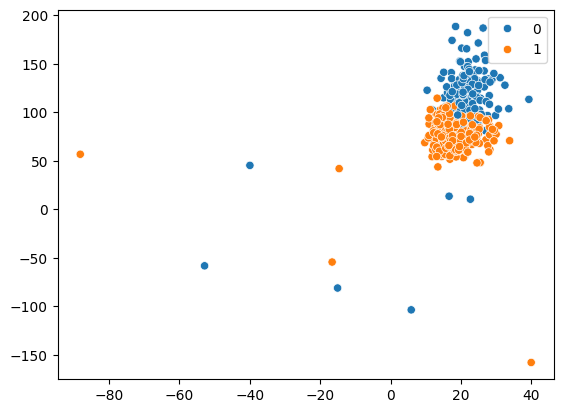

In [ ]:
# Load dataset
data = load_breast_cancer()
# a dataset with just a few outliers
labels_w_outliers = data['target']
features_w_outliers = data['data']
N_outliers = 10
for i in range(N_outliers):
    out_features = [80*norm.rvs() for i in range(len(feature_names))]
    out_label = bernoulli.rvs(0.5)
    features_w_outliers = np.vstack([features_w_outliers, out_features])
    labels_w_outliers = np.append(labels_w_outliers, out_label)

sns.scatterplot(x=features_w_outliers[:, feat_1], y=features_w_outliers[:, feat_2], hue=labels_w_outliers[:])

In [12]:
# training with outliers
# Split our data
train, test, train_labels, test_labels = train_test_split(features_w_outliers,
                                                          labels_w_outliers,
                                                          test_size=0.33,
                                                          random_state=42)

# Initialize our classifier
gnb = GaussianNB()

# Train our classifier
model = gnb.fit(train, train_labels)

# Make predictions
preds = gnb.predict(test)
# print(preds)

# Evaluate accuracy
print(accuracy_score(test_labels, preds))

0.8020833333333334


# C. Cleaning up a dataset 

## Missing values : 

- deletion

- manual filling

- global value ('Nan', 0, mean, most frequent or likely)

## Remove duplicates

## Dealing with data and labelling noise (biais and variation)

- automatic suppression of outliers 

- eliminating outliers after a first clustering

- smoothing through regression

# D. Data transformation for Machine Learning purposes

## Discretization 

- numerical values that have a qualitative rather than quantitative meaning. ex: regions

- making sets, divide to have them of similar cardinality, rather than with a regular step. 

- in extreme cases: binarization!


## Renormalization 

- min-max scaling 

- cutting off extreme values 

- log scaling 

- Z-score 


## Adding new features if relevant

- if some arithmetic combination of previous features seem to be particularly relevant, insert them. 

## Dealing with unbalanced data 

Classes with very different cardinalities. ex for two classes: 

- 20-40% minority class: slightly unbalanced
    
- 1%-20%: moderately unbalanced 
    
- <1%: extremely unbalanced

Solutions: 

- undersample majority classes 

- oversample minority classes: 

    - repetitions 
    
    - synthetic data 
    
- make several trainings with different parts of the majority set, then join them

## Fractionning the data for machine learning

- first idea: a training and a testing set; 

- better idea: a training, a validation, and a testing set. 

# Practical cases with unbalanced data

<Axes: >

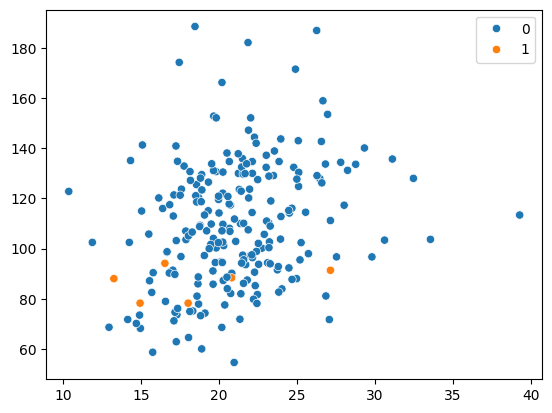

In [ ]:
# a dataset with data errors
unbalanced_features = data['data']
unbalanced_labels = bad_labels.copy()
p_keep = 0.015
l=0
while l  < len(unbalanced_labels):
    if unbalanced_labels[l]==1:
        keep = bernoulli.rvs(p_keep)
        if keep == 0:
            unbalanced_features = np.delete(unbalanced_features, (l), axis=0)
            unbalanced_labels = np.delete(unbalanced_labels, [l])
            l -= 1
    l+=1

sns.scatterplot(x=unbalanced_features[:, feat_1], y=unbalanced_features[:, feat_2], hue=unbalanced_labels[:])

In [24]:
# training with unbalanced classes
# Split our data
train, test, train_labels, test_labels = train_test_split(unbalanced_features,
                                                          unbalanced_labels,
                                                          test_size=0.33,
                                                          random_state=42)

# Initialize our classifier
gnb = GaussianNB()

# Train our classifier
model = gnb.fit(train, train_labels)

# Make predictions
preds = gnb.predict(test)
# print(preds)

# Evaluate accuracy
print(accuracy_score(test_labels, preds))

0.7866666666666666


## First approach: undersampling

<Axes: >

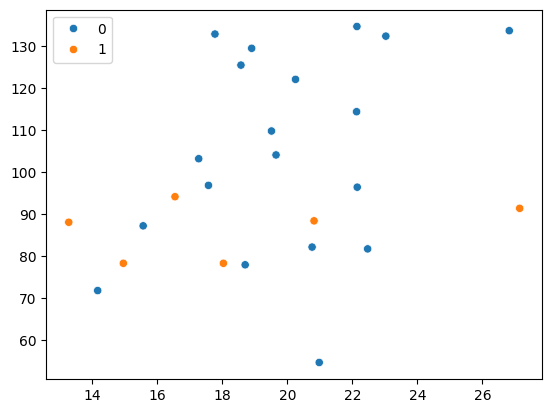

In [ ]:
# a dataset with less negative cases
undersmpl_features = unbalanced_features.copy()
undersmpl_labels = unbalanced_labels.copy()
p_keep = 0.1
l=0
while l  < len(undersmpl_labels):
    if undersmpl_labels[l]==0:
        keep = bernoulli.rvs(p_keep)
        if keep == 0:
            undersmpl_features = np.delete(undersmpl_features, (l), axis=0)
            undersmpl_labels = np.delete(undersmpl_labels, [l])
            l -= 1
    l+=1

sns.scatterplot(x=undersmpl_features[:, feat_1], y=undersmpl_features[:, feat_2], hue=undersmpl_labels[:])

In [26]:
# training with undersampling
# Split our data
train, test, train_labels, test_labels = train_test_split(undersmpl_features,
                                                          undersmpl_labels,
                                                          test_size=0.33,
                                                          random_state=42)

# Initialize our classifier
gnb = GaussianNB()

# Train our classifier
model = gnb.fit(train, train_labels)

# Make predictions
preds = gnb.predict(test)
# print(preds)

# Evaluate accuracy
print(accuracy_score(test_labels, preds))

0.7777777777777778


## Second Approach: repetitions

<Axes: >

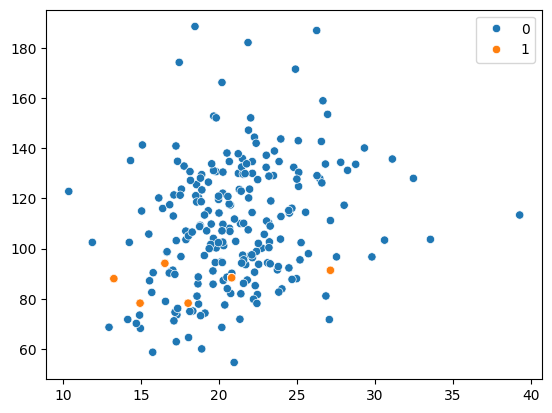

In [ ]:
# a dataset with repeated positive cases
rep_pos_features = unbalanced_features.copy()
rep_pos_labels = unbalanced_labels.copy()
N_rep = 20
l=0
while l  < len(labels):
    if rep_pos_labels[l]==1:
        rep_pos_features = np.vstack([rep_pos_features, rep_pos_features[l]])
        rep_pos_labels = np.append(rep_pos_labels, 1)
    l+=1

sns.scatterplot(x=rep_pos_features[:, feat_1], y=rep_pos_features[:, feat_2], hue=rep_pos_labels[:])

In [28]:
# training with repetions of minority class
# Split our data
train, test, train_labels, test_labels = train_test_split(rep_pos_features,
                                                          rep_pos_labels,
                                                          test_size=0.33,
                                                          random_state=42)

# Initialize our classifier
gnb = GaussianNB()

# Train our classifier
model = gnb.fit(train, train_labels)

# Make predictions
preds = gnb.predict(test)
# print(preds)

# Evaluate accuracy
print(accuracy_score(test_labels, preds))

0.9368421052631579


## Third approach: adding synthetic data

<Axes: >

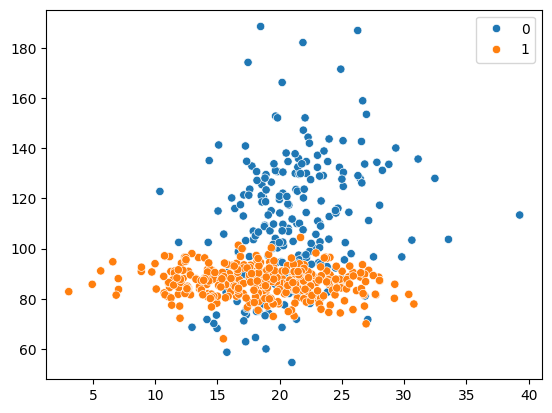

In [ ]:
# a dataset with repeated positive cases
from sklearn.gaussian_process import GaussianProcessRegressor

syn_pos_features = unbalanced_features.copy()
syn_pos_labels = unbalanced_labels.copy()
N_rep = 20
pos_features = syn_pos_features[syn_pos_labels==1]
pos_mean = np.mean(pos_features, axis=0)
pos_var = np.diag(np.var(pos_features, axis=0))
l=0
while l  < len(labels):
    if syn_pos_labels[l]==1:
        syn_pos_features = np.vstack([syn_pos_features, np.random.multivariate_normal(pos_mean, pos_var, 1)])
        syn_pos_labels = np.append(syn_pos_labels, 1)
    l+=1

sns.scatterplot(x=syn_pos_features[:, feat_1], y=syn_pos_features[:, feat_2], hue=syn_pos_labels[:])

In [35]:
# training with repetions of minority class
# Split our data
train, test, train_labels, test_labels = train_test_split(syn_pos_features,
                                                          syn_pos_labels,
                                                          test_size=0.33,
                                                          random_state=42)

# Initialize our classifier
gnb = GaussianNB()

# Train our classifier
model = gnb.fit(train, train_labels)

# Make predictions
preds = gnb.predict(test)
# print(preds)

# Evaluate accuracy
print(accuracy_score(test_labels, preds))

0.9473684210526315


## Fourth approach: several models with division of majority class

In [53]:
# neg_features = unbalanced_features.copy()
# neg_features = neg_features[unbalanced_labels==0]
pred_list = []
# Split our data
train, test, train_labels, test_labels = train_test_split(unbalanced_features.copy(),
                                                            unbalanced_labels.copy(),
                                                            test_size=0.33,
                                                            random_state=42)

train_pos = train[train_labels==1]
train_neg = train[train_labels==0]
N_pos = len(train_pos)
k=0
while (k+1)*N_pos < len(train_neg):
    # print((k+1)*N_pos)
    # local training set
    local_train_neg = train_neg[k*N_pos:(k+1)*N_pos]
    local_train = np.vstack([local_train_neg, train_pos])
    local_labels = np.concatenate((np.zeros(N_pos), np.ones(N_pos)))
    # print(len(local_labels)==len(local_train))

    # Initialize our classifier
    gnb = GaussianNB()

    # Train our classifier
    model = gnb.fit(local_train, local_labels)
    # Make predictions
    preds = gnb.predict(test)

    pred_list.append(preds)
    k+=1
    
# last model
# local training set
local_train_neg = train_neg[k*N_pos::]
local_train = np.vstack([local_train_neg, train_pos])
local_labels = np.concatenate((np.zeros(len(local_train_neg)), np.ones(N_pos)))
# Initialize our classifier
gnb = GaussianNB()
# Train our classifier
model = gnb.fit(local_train, local_labels)
# Make predictions
preds = gnb.predict(test)
pred_list.append(preds)

pred_mat = np.array(pred_list)
full_preds = np.median(pred_mat, axis=0)


#  Evaluate accuracy
print(accuracy_score(test_labels, full_preds.astype(int)))

0.76
